___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [15]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import seaborn as sns

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [3]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)
BAC = data.DataReader("BAC", 'yahoo', start, end)
C = data.DataReader('C','yahoo',start,end)
GS = data.DataReader('GS','yahoo',start,end)
JPM = data.DataReader('JPM','yahoo',start,end)
WFC = data.DataReader('WFC','yahoo',start,end)

In [5]:
C.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,448.516144
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870900.0,440.235657
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143100.0,442.419647
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370200.0,442.419647
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680700.0,440.326721


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [6]:
tickers = ['BAC','C','GS','JPM','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [8]:
bank_stocks = pd.concat([BAC, C, GS, JPM, WFC], axis=1, keys=tickers)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.717861   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  35.338535   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  35.384048   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  35.330940   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  35.353695   

                     C                                        ...      \
                  High         Low        Open       Close    ...       
Date                                                          ...       
2006-01-03  493.799988  481.100006  490.000000  492.899994    ...       
2006-01-04  491.000000  483.500000  488.600006  483.799988    ...       
2006-01-05  487.799988  484.000000  484.399994  486.200012    ...       
2006-01-06  489.000000  482.000000  488.799988  486.200012    ...       
2006-01-09  487.399994  483.000000  486.000000  483.899994    ...       

                  JPM                                          WFC             \
                 Open      Close      Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03  39.830002  40.189999  12838600.0  27.994356  31.975000  31.195000   
2006-01-04  39.779999  39.619999  13491500.0  27.832783  31.820000  31.365000   
2006-01-05  39.610001  39.740002   8109400.0  27.917086  31.555000  31.309999   
2006-01-06  39.919998  40.020000   7966900.0  28.113771  31.775000  31.385000   
2006-01-09  39.880001  40.669998  16575200.0  28.570408  31.825001  31.555000   

                                                         
                 Open      Close      Volume  Adj Close  
Date                                                     
2006-01-03  31.600000  31.900000  11016400.0  21.045347  
2006-01-04  31.799999  31.530001  10870000.0  20.801256  
2006-01-05  31.500000  31.495001  10158000.0  20.778162  
2006-01-06  31.580000  31.680000   8403800.0  20.900213  
2006-01-09  31.674999  31.674999   5619600.0  20.896914  

[5 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      \
Stock Info   Adj Close        High         Low        Open       Close   
Date                                                                     
2006-01-03   35.717861  493.799988  481.100006  490.000000  492.899994   
2006-01-04   35.338535  491.000000  483.500000  488.600006  483.799988   
2006-01-05   35.384048  487.799988  484.000000  484.399994  486.200012   
2006-01-06   35.330940  489.000000  482.000000  488.799988  486.200012   
2006-01-09   35.353695  487.399994  483.000000  486.000000  483.899994   

Bank Ticker    ...            JPM                                    \
Stock Info     ...           Open      Close      Volume  Adj Close   
Date           ...                                                    
2006-01-03     ...      39.830002  40.189999  12838600.0  27.994356   
2006-01-04     ...      39.779999  39.619999  13491500.0  27.832783   
2006-01-05     ...      39.610001  39.740002   8109400.0  27.917086   
2006-01-06     ...      39.919998  40.020000   7966900.0  28.113771   
2006-01-09     ...      39.880001  40.669998  16575200.0  28.570408   

Bank Ticker        WFC                                                          
Stock Info        High        Low       Open      Close      Volume  Adj Close  
Date                                                                            
2006-01-03   31.975000  31.195000  31.600000  31.900000  11016400.0  21.045347  
2006-01-04   31.820000  31.365000  31.799999  31.530001  10870000.0  20.801256  
2006-01-05   31.555000  31.309999  31.500000  31.495001  10158000.0  20.778162  
2006-01-06   31.775000  31.385000  31.580000  31.680000   8403800.0  20.900213  
2006-01-09   31.825001  31.555000  31.674999  31.674999   5619600.0  20.896914  

[5 rows x 30 columns]

** Check the head of the bank_stocks dataframe.**

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [12]:
bank_stocks.xs(key='Close',axis='columns',level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [13]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [14]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
    
returns.head()

,BAC Return,C Return,GS Return,JPM Return,WFC Return
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

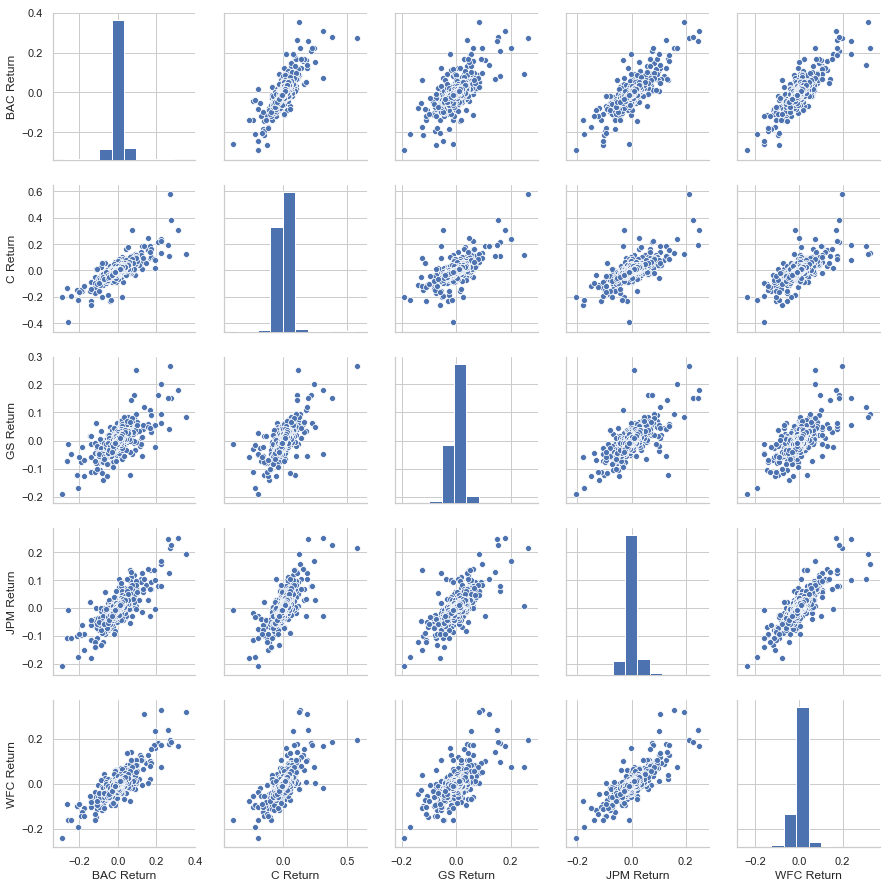

In [18]:
sns.set()
sns.set_style('whitegrid')
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [21]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,WFC Return
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,-0.000158


In [22]:
returns.min()

BAC Return   -0.289694
C Return     -0.390244
GS Return    -0.189596
JPM Return   -0.207274
WFC Return   -0.238223
dtype: float64

In [24]:
returns['BAC Return'].min()

-0.2896935896149381

In [28]:
returns['BAC Return'].argmin()


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  """Entry point for launching an IPython kernel.


Timestamp('2009-01-20 00:00:00')

In [30]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
WFC Return   2009-01-20
dtype: datetime64[ns]

In [32]:
for date in returns:
    print(date, returns[date].argmin())

BAC Return 2009-01-20 00:00:00
C Return 2009-02-27 00:00:00
GS Return 2009-01-20 00:00:00
JPM Return 2009-01-20 00:00:00
WFC Return 2009-01-20 00:00:00


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  


** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [47]:
sortedret = returns.max().sort_values(ascending=False)
sortedret

C Return      0.578249
BAC Return    0.352691
WFC Return    0.327645
GS Return     0.264678
JPM Return    0.250967
dtype: float64

In [51]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [52]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
WFC Return    0.030238
dtype: float64

In [77]:
returns.ix['2015-01-01':'2015-12-31'].std().sort_values(ascending=False)
#the riskiest stock of 2015 is BAC, who has the highest standart deviation

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
WFC Return    0.012591
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for GM **

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


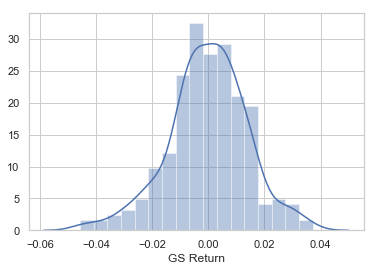

In [84]:
sns.distplot(returns['GS Return'][1:].ix['2015-01-01':'2015-12-31'])

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


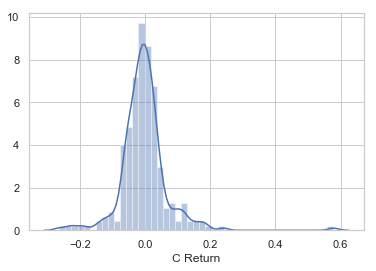

In [85]:
sns.distplot(returns['C Return'][1:].ix['2008-01-01':'2008-12-31'])

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

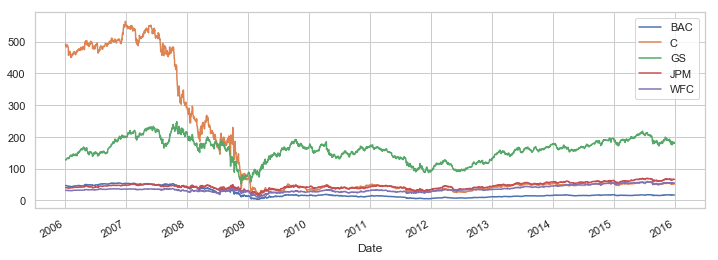

In [91]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

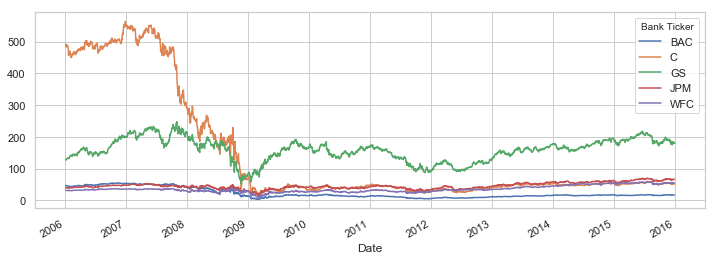

In [96]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

In [98]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [99]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.717861
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,35.338535
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,35.384048
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,35.330940
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,35.353695


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



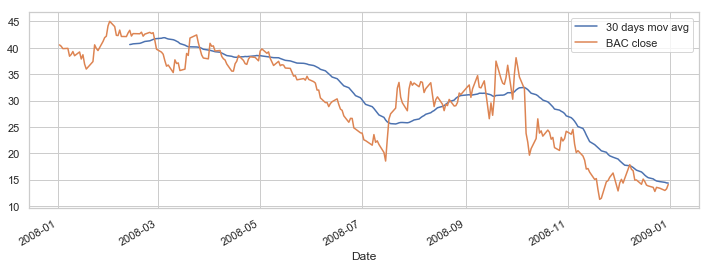

In [106]:
plt.figure(figsize=(12,4))
BAC['Close'].ix['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 days mov avg')
BAC['Close'].ix['2008-01-01':'2008-12-31'].plot(label='BAC close')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

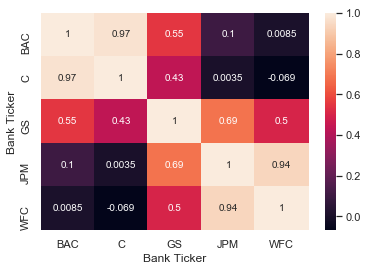

In [112]:

sc = returns.corr()
sns.heatmap(bank_stocks.xs(key='Close',axis='columns',level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

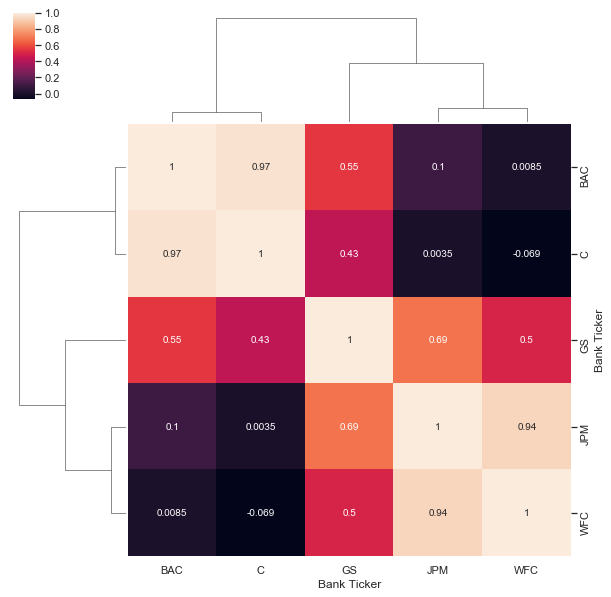

In [113]:
sns.clustermap(bank_stocks.xs(key='Close',axis='columns',level='Stock Info').corr(),annot=True)

In [134]:
plt.figure(figsize=(8,8))
bank_stocks.xs(key='Close',axis='columns',level='Stock Info').corr().iplot(kind='heatmap',colorscale='rdylbu')

<Figure size 576x576 with 0 Axes>

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [122]:
bank_stocks.xs(key='BAC',axis=1,level='Bank Ticker').head()

Stock Info,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.717861
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,35.338535
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,35.384048
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,35.330940
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,35.353695


In [137]:
bank_stocks.xs(key='BAC',axis=1,level='Bank Ticker').ix['2015-01-01':'2016-01-01'].iplot(kind='candle') 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of GS for the year 2015.**

In [150]:
JKSE = data.DataReader('^JKSE', 'yahoo', start, datetime.datetime(2019,11,15))
JKSE['Close'].ix['2015-01-01':'2019-11-15'].ta_plot(study='sma')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [154]:
JKSE['Close'].ix['2019-01-01':'2019-11-15'].tail()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



Date
2019-11-11    6148.740234
2019-11-12    6180.992188
2019-11-13    6142.500977
2019-11-14    6098.950195
2019-11-15    6128.345215
Name: Close, dtype: float64

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [155]:
JKSE['Close'].ix['2015-01-01':'2019-11-15'].ta_plot(study='boll')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.